# Frequenza parole e forme UFO

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from math import ceil, floor


OUT_FOLDER = 'grafici/FrequenzaParole_FormeUFO'
FIGURE_SIZE = (20, 8)

%matplotlib inline

In [3]:
DATASET = 'ufos.csv'
data = pd.read_csv(DATASET)
len(data)

80332

## Calcoliamo le parole più frequenti

In [4]:
import re
from collections import defaultdict

# compiliamo la regex per performance
words_re = re.compile('[a-zA-Z0-9]+')

def tokenize(comment):
    return words_re.findall(comment)

occurrencies = defaultdict(int)
for iloc, comment in data['comments'].dropna().iteritems():
    for word in tokenize(comment):
        occurrencies[word] += 1
occurrencies = pd.Series(occurrencies)

# Rimuoviamo un po' di articoli e parole noiose
WORDS_TO_FILTER = [
    'the', 'in', 'a', 'and', 'of', 'i', 'to', 'was', 'at', 'it', 'with', 
    'over', 'on', 'then', 'from', 'my', 'saw', 'like', 'that', '3', '2', 
    'no', 'for', 'very', 'seen', 'we', 'were'
]
occurrencies = occurrencies.drop(labels=WORDS_TO_FILTER)
# Sommiamo 'light' e 'lights' e 'objects' e 'object' che si riferiscono alla stessa parola
occurrencies['lights'] += occurrencies['light']
occurrencies['objects'] += occurrencies['object']
occurrencies = occurrencies.drop(labels=['light', 'object'])

occurrencies = occurrencies.sort_values(ascending=False).head(20)  # prendiamo solo le prime 20 parole

## Calcoliamo le forme di UFO più avvistate

In [8]:
shape_counts = data['shape'].value_counts()
# Sommiamo tutti i valori con < 10 casi in un unico 'other'
small_values = shape_counts[shape_counts < 10]
total = sum(small_values)
shape_counts = shape_counts.drop(index=small_values.index)
shape_counts['other'] = total
shape_counts = shape_counts.sort_values(ascending=False)

In [9]:
GRAY = '#cccccc'

## Versione senza alcun colore

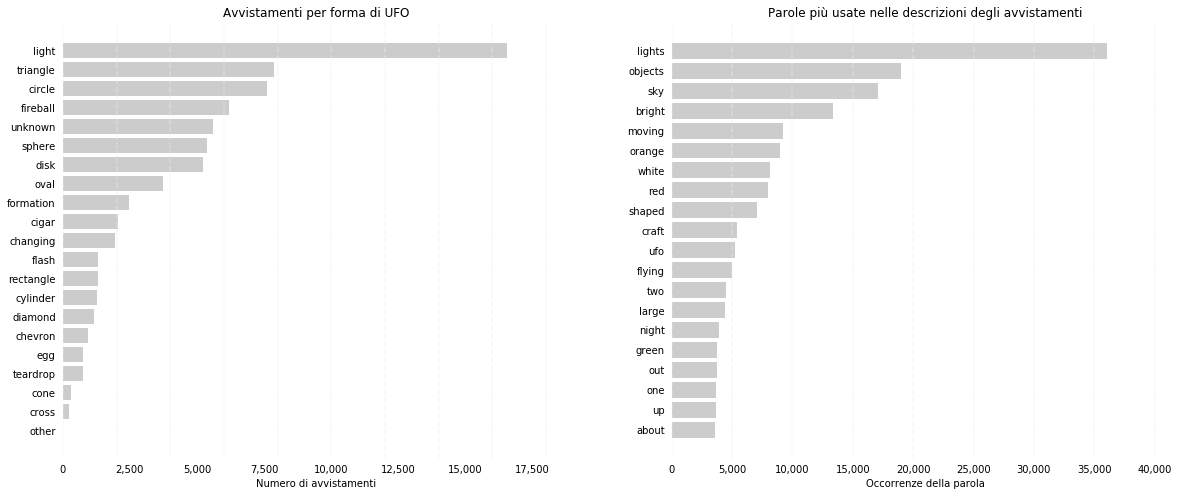

In [10]:
fig, (ax, bx) = plt.subplots(nrows=1, ncols=2, figsize=FIGURE_SIZE)


shape_bars = ax.barh(shape_counts.index, shape_counts.values, color=GRAY)
words_bars = bx.barh(occurrencies.index, occurrencies.values, color=GRAY)

ax.set_title('Avvistamenti per forma di UFO')
ax.set_xlabel('Numero di avvistamenti')

bx.set_title('Parole più usate nelle descrizioni degli avvistamenti')
bx.set_xlabel('Occorrenze della parola')

for ax in [ax, bx]:
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_visible(False)
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    ax.tick_params(
        axis="both", 
        which="both", 
        bottom=False, 
        top=False, 
        labelbottom=True, 
        left=False, 
        right=False, 
        labelleft=True
    )
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        
plt.savefig(f'{OUT_FOLDER}/NoColor.png')
plt.show()

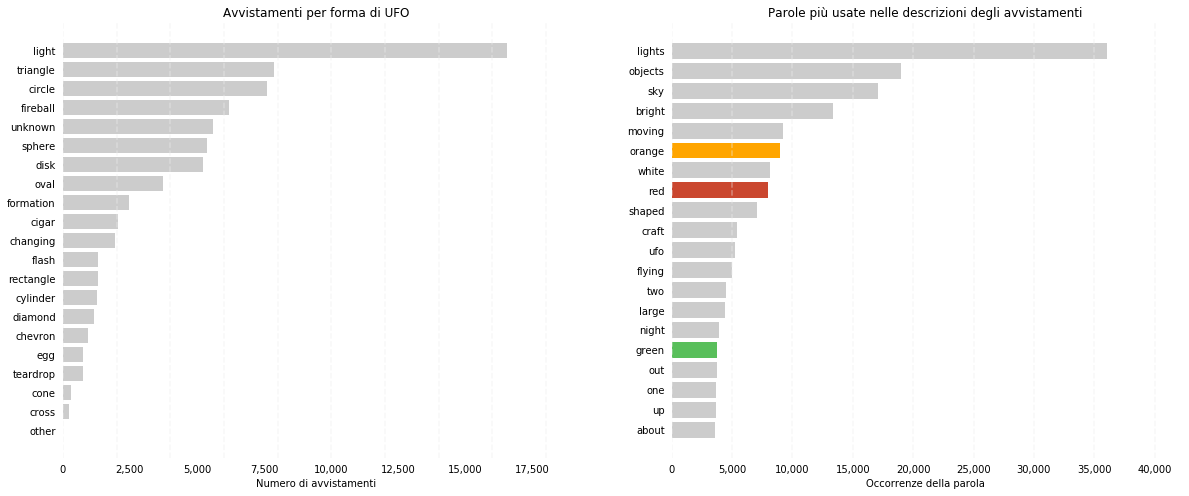

In [11]:
fig, (ax, bx) = plt.subplots(nrows=1, ncols=2, figsize=FIGURE_SIZE)

GRAY = '#cccccc'

shape_bars = ax.barh(shape_counts.index, shape_counts.values, color=GRAY)

colors = [GRAY] * len(occurrencies.index)
find_index = lambda x: np.where(occurrencies.index.values == x)[0][0]

colors[find_index('green')] = '#59bf5b'
colors[find_index('orange')] = '#ffa500'
colors[find_index('red')] = '#ca472f'


words_bars = bx.barh(occurrencies.index, occurrencies.values, color=colors)

ax.set_title('Avvistamenti per forma di UFO')
ax.set_xlabel('Numero di avvistamenti')

bx.set_title('Parole più usate nelle descrizioni degli avvistamenti')
bx.set_xlabel('Occorrenze della parola')

for ax in [ax, bx]:
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_visible(False)
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    ax.tick_params(
        axis="both", 
        which="both", 
        bottom=False, 
        top=False, 
        labelbottom=True, 
        left=False, 
        right=False, 
        labelleft=True
    )
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        
plt.savefig(f'{OUT_FOLDER}/Colorato.png')
plt.show()